<font size=6>Midterm Project</font><br>
<font size=4>Professor Bahram Mobasher and Instructor Abtin Shahidi<font><br>
<font size=3>Submitted by: Ray Felipe<font><br>
<font size=3>University of California, Riverside<font>


## Executive Summary

Working on a Machine Learning project requires detailed understanding of the data set. This understanding must include not only the structure of the data but also the surface level meaning of what the data is telling us as well us it's underlying meaning.

Given this understanding a developer or a stakeholder can then formulate goals on they want to learn from the data. This learning can be isolated in the data set itself, or for future unseen data, as in the case for machine learning objectives.

In this project I have selected the winequality-red data set. A collection of wine data instances that has been classified by "quality" based on 11 features. The goal of this project is to apply statistical analysis as well as algorithm for machine learning analysis and processing. 

## 1. Understanding and explaining the data set.

Before we can apply machine learning analysis, it is important that we first create functions that will allow us to easily perform descriptive statistical analysis. Given that there are many ways a data can be viewed, a function will allow us to easily view these statistical definitions simply by plugging in target features for analysis.

Along with initial housekeeping (package imports) the first step, of course, is to load the data.

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
import os
import scipy.stats
from scipy.stats import norm
from statistics import mean
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from functools import reduce

desired_width=520
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### 1.1 Load raw data

In [3]:
filename = "winequality-red.csv"
raw_data_file = open(filename, 'rt')
reader = csv.reader(raw_data_file, delimiter=';', quoting=csv.QUOTE_NONE)
raw_data = list(reader)
raw_data_file.close()

Load and process data features for basic statisitical analysis and general understanding

In [4]:
# Show column headers (features)
print(raw_data[0])

['"fixed acidity"', '"volatile acidity"', '"citric acid"', '"residual sugar"', '"chlorides"', '"free sulfur dioxide"', '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"', '"alcohol"', '"quality"']


Get data for each column

In [5]:
def get_specific_col(col_name):
    return_data = []
    col_pos = 0
    column_headers = raw_data[0]
    raw_data_no_header = raw_data[1:len(raw_data)]
    for k in range(len(column_headers)):
        if column_headers[k].strip('\"') == col_name:
            col_pos = k
            break

    for i in range(len(raw_data_no_header)):
        return_data.append(float(raw_data_no_header[i][col_pos]))

    return return_data

The function above extracts the data under each column, which I have used to view stats for a given feature. In the next section below I used "fixed acidity" as an example.

### 1.2 Basic statistical info

In [7]:
## Basic Statistical Info
def view_data_stat_info(raw_data_feature_name):
    raw_data_feature_list = get_specific_col(raw_data_feature_name)
    print("Mean: " + str(np.mean(raw_data_feature_list)))
    print("Median: " + str(np.median(raw_data_feature_list)))
    print("fixed_acidity, sorted: " + str(np.sort(raw_data_feature_list)))
    print("Max: " + str(np.max(raw_data_feature_list)))
    print("Min: " + str(np.min(raw_data_feature_list)))
    print("Std Deviation: " + str(np.std(raw_data_feature_list, ddof=1)))

print(view_data_stat_info("fixed acidity"))

Mean: 8.31963727329581
Median: 7.9
fixed_acidity, sorted: [ 4.6  4.7  4.9 ... 15.6 15.6 15.9]
Max: 15.9
Min: 4.6
Std Deviation: 1.7410963181276953
None


Another example; alcohol content. We simply change the <i>raw_data_feature_name</i> to "alcohol"

In [8]:
def view_data_stat_info(raw_data_feature_name):
    raw_data_feature_list = get_specific_col(raw_data_feature_name)
    print("Mean: " + str(np.mean(raw_data_feature_list)))
    print("Median: " + str(np.median(raw_data_feature_list)))
    print("fixed_acidity, sorted: " + str(np.sort(raw_data_feature_list)))
    print("Max: " + str(np.max(raw_data_feature_list)))
    print("Min: " + str(np.min(raw_data_feature_list)))
    print("Std Deviation: " + str(np.std(raw_data_feature_list, ddof=1)))

view_data_stat_info("alcohol")


Mean: 10.422983114446529
Median: 10.2
fixed_acidity, sorted: [ 8.4  8.4  8.5 ... 14.  14.  14.9]
Max: 14.9
Min: 8.4
Std Deviation: 1.0656675818473946


The basic statistical info above gives us important context on the data. For example, we know that the average alochol content of wine is 10, and that wines come in 15 alcohol content. We can further perform similar analysis where we identify the highest rated wine (a feature in the data called "quality") and it's alcohol or fixed acidity content.


In addition, to better understand the data I created visualization plots.

### 1.3 Data Visualization

Using Matplotlib, I created simple plots and graphs for visual understanding of the raw data. In the example below, I used "citric acid" feature.

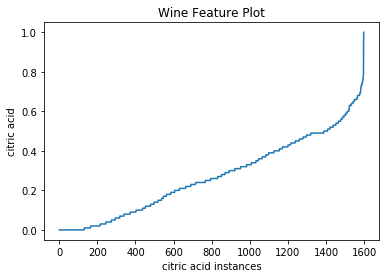

In [12]:
target_data_feature = "citric acid"
raw_data_feature_list = get_specific_col(target_data_feature)
x_for_plot = np.arange(0, len(raw_data_feature_list))
y_for_plot = np.sort(raw_data_feature_list)
#print(raw_data_feature_list)
#y_for_plot = raw_data_feature_list

plt.title("Wine Feature Plot")
plt.xlabel(target_data_feature + " instances")
plt.ylabel(target_data_feature)
plt.plot(x_for_plot, y_for_plot)

For additional reference, here's the unsorted plot data for alcohol content as well as the scatter plot.

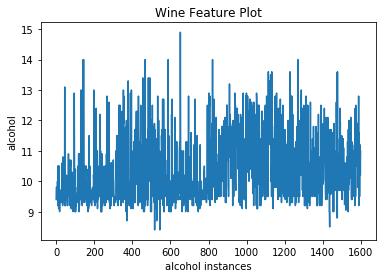

In [13]:
target_data_feature = "alcohol"
raw_data_feature_list = get_specific_col(target_data_feature)
x_for_plot = np.arange(0, len(raw_data_feature_list))
y_for_plot = raw_data_feature_list

plt.title("Wine Feature Plot")
plt.xlabel(target_data_feature + " instances")
plt.ylabel(target_data_feature)
plt.plot(x_for_plot, y_for_plot)

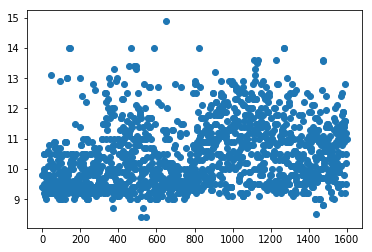

In [14]:
plt.scatter(x_for_plot, y_for_plot)

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 , 14.25, 14.9 ]),
 <a list of 10 Patch objects>)

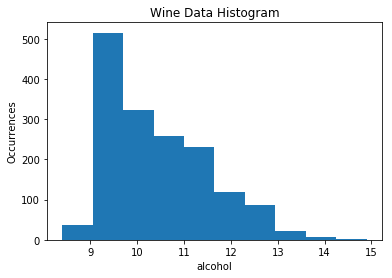

In [15]:
plt.title("Wine Data Histogram")
plt.xlabel(target_data_feature)
plt.ylabel("Occurrences")
plt.hist(raw_data_feature_list, bins=10)

Also important to visualization is the PDF (Probability Distribution Function)[1]

Text(0, 0.5, 'Distribution')

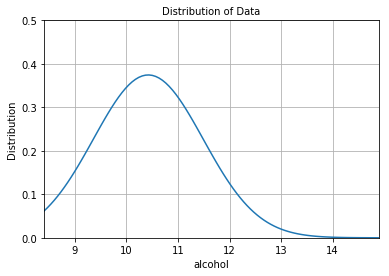

In [16]:
x_min = np.min(raw_data_feature_list)
x_max = np.max(raw_data_feature_list)

mean = np.average(raw_data_feature_list)
std = np.std(raw_data_feature_list)
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x, y)
plt.grid()
plt.xlim(x_min, x_max)
plt.ylim(0, .5)
plt.title('Distribution of Data', fontsize=10)
plt.xlabel(target_data_feature)
plt.ylabel('Distribution')

The visualization graphs above helps in understanding the data. In the distribution graph above, we can tell that the probability of a given wine instance would have a 28 to 38% probability of having 9.5 to 11.5 alcohol content.


## 2. Processing data, cleaning up.

So far I've been working on the raw data, which is messy. It has quotes which can potentially cause problems when loading, parsing, and analyzing the data. Quotes or any other unwanted characters can cause issues in programming languages in general. This is also true for Python. 

This section focuses on cleaning up the data and performing data processing.

### 2.1 Data cleansing

In [20]:
filename = "wine-comma.csv"
if os.path.isfile(filename) == True:
    os.remove(filename)
    
for i in range(len(raw_data)):
    temp_str = str(raw_data[i])
    #print("temp str:" + temp_str)
    data_csv = temp_str.replace(";", ",")
    data_csv = data_csv.replace("\"", "")
    data_csv = data_csv.replace("\'", "")
    data_csv = data_csv.replace("[", "")
    data_csv = data_csv.replace("]", "")
    data_csv = data_csv.replace(" ", "")
    #print(data_csv)
    file = open(filename, 'a')
    file.write(data_csv+"\n")
    file.close()

raw_data_clean = open(filename, 'rt')
reader = csv.reader(raw_data_clean, delimiter=',', quoting=csv.QUOTE_NONE)
data_clean = list(reader)
raw_data_clean.close()

The first 10 rows of the cleaned data is shown below.

In [21]:
print(data_clean[1:10])

[['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5'], ['7.8', '0.88', '0', '2.6', '0.098', '25', '67', '0.9968', '3.2', '0.68', '9.8', '5'], ['7.8', '0.76', '0.04', '2.3', '0.092', '15', '54', '0.997', '3.26', '0.65', '9.8', '5'], ['11.2', '0.28', '0.56', '1.9', '0.075', '17', '60', '0.998', '3.16', '0.58', '9.8', '6'], ['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5'], ['7.4', '0.66', '0', '1.8', '0.075', '13', '40', '0.9978', '3.51', '0.56', '9.4', '5'], ['7.9', '0.6', '0.06', '1.6', '0.069', '15', '59', '0.9964', '3.3', '0.46', '9.4', '5'], ['7.3', '0.65', '0', '1.2', '0.065', '15', '21', '0.9946', '3.39', '0.47', '10', '7'], ['7.8', '0.58', '0.02', '2', '0.073', '9', '18', '0.9968', '3.36', '0.57', '9.5', '7']]


The step above removed all quotes and double-quotes, and also the spaces in the features.  <i>Note: Eventhough the output above is showing single quotes, the saved output file does not have them.</i>

For easier processing, I loaded the newly cleaned data, <i>wine-comma.csv</i>, in a Pandas Dataframe.

### 2.2 Dataframe for processing

DataFrame provides libraries of tools that allows easier processing of data. The output below shows that the data is now loaded in a nicely organized data structure.

In [22]:
data_pd = pd.read_csv('wine-comma.csv')
data_pd.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Dividing your data into a training and test set.

Now let's identify features to predict labels. In this case, let's try "Quality". Knowing the target label we can start the process of splitting the data into training and test set.

### 3.1 Identify features to predict labels.

Let's identify features to predict labels[2]. In this case. Let's try "quality".

In [23]:
target_feature = "quality"  # The feature to be predicted

data_pd_y = data_pd[target_feature]
data_pd_x = data_pd.drop(target_feature, axis=1)

### 3.2 Split into train and test set

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data_pd_x, data_pd_y, train_size=0.80, test_size=0.20)

Above I used "quality" feature as the target label for prediction and ran the <i>drop()</i> function to take it out of the rest the dataset. Afterwards, I used <i>train_test_split()</i> function to split the data. The train size is 80% and the test size is 20%[3].

In [25]:
x_train.shape

(1279, 11)

In [26]:
x_test.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
455,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4
398,11.5,0.590,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0
1408,8.1,0.290,0.36,2.2,0.048,35.0,53.0,0.99500,3.27,1.01,12.4
1347,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2


In [27]:
x_test.shape

(320, 11)

In [28]:
y_train.head()

818     5
1249    6
571     6
104     5
483     5
Name: quality, dtype: int64

In [29]:
y_train.shape

(1279,)

In [30]:
y_test.head()

455     8
398     6
1408    7
1347    5
480     5
Name: quality, dtype: int64

In [31]:
y_test.shape

(320,)

## 4. Choosing the relevant algorithm.

The choose the right algorithm for a machine learning project a goal must be defined first. Are we trying to classify our data? Are we trying to find patterns? Are we looking into grouping them into clusters? In each case there are machine learning algorithms for these; classification algorithms, frequent pattern algorithms, clustering algorithms, respectively.

In this project our goal is classify data by quality and be able to predict future (unseen) data on what would be rated as high quality. This dovetails into the first section of this project - understanding our data. Note that "quality" is the last data feature in our data set.

I used KNN to predict the quality of the wine based on existing parameters. 


## 5. Writing a python code to perform learning. (You can reuse every code from the lectures)


KNN algorithm is a lazy learning algorithm, which means that it does not created a decision structure as in Decision Tree algorithm training. Instead, it predicts the outcome based on a voting step in the algorithm, with the highest vote (the nearest neighbor) determing the target feature. In this case, our target feature is <i>quality</i>.

### 5.1 KNN Classification

In [32]:
def knn_lib_fit(x_train, y_train):
    knn_x = x_train
    knn_y = y_train
    knn = KNeighborsClassifier(n_neighbors=3)
    try:
        knn.fit(knn_x, knn_y)
    except Exception as error:
        print('Error: ' + repr(error))
        if repr(error) == "ValueError(\"Unknown label type: 'continuous'\")":
            print("erropr here ==================")
            knn_y = knn_y.apply(lambda x: int(x * 100000))
            knn.fit(knn_x, knn_y)

    y_pred_knn = knn.predict(knn_x)
    return y_pred_knn

In the function above I used SKlearn's <i>KNeighborsClassifier()</i> function. This is why I called it knn_lib_fit, with lib indicating library. Later on I created a KNN algorithm, for extra credit, without using any libraries.

In [33]:
print("KNN Lib Fit Prediction:")
knn_lib_prediction = knn_lib_fit(x_train, y_train)
knn_lib_prediction
#print("knn_lib_prediction: " + str(knn_lib_prediction))

KNN Lib Fit Prediction:


array([6, 6, 6, ..., 5, 5, 5], dtype=int64)

Running the knn_lib_fit gives us the prediction output above. In the next section we'll assess the accuracy of this prediction.

### 5.2 Logistic Regression

In addition to KNN, I also used logistic regression. Similarly, I used SKLearn's regression library for this step.

In [34]:
# Log Regression fit
def log_reg_fit(x_train, y_train):
    log_reg_x = x_train
    log_reg_y = y_train
    logreg = LogisticRegression(solver='liblinear', multi_class='auto')
    try:
        logreg.fit(log_reg_x, log_reg_y)
        #y_pred_log_reg = logreg.predict(log_reg_x)
    except Exception as error:
        if repr(error) == "ValueError(\"Unknown label type: 'continuous'\")":
            # It is float column. So convert.
            log_reg_y = log_reg_y.apply(lambda x: int(x * 100000))
            #print(log_reg_y)
            #print('Error: ' + repr(error))
            logreg.fit(log_reg_x, log_reg_y)

    y_pred_log_reg = logreg.predict(log_reg_x)
    return y_pred_log_reg

In [35]:
print("log_reg_fit prediction:")
log_reg_fit(x_train, y_train)

log_reg_fit prediction:


array([5, 6, 6, ..., 5, 5, 5], dtype=int64)

In the step below I created a plot to see the predictions as it relates to the test data.

Text(0, 0.5, 'Predictions')

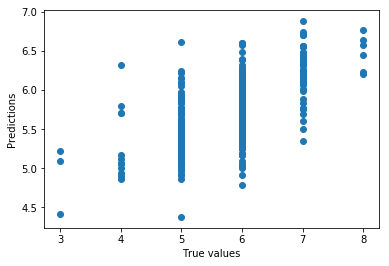

In [36]:
model = lm().fit(x_train, y_train)
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')

Based on the predicted outcome and test data prior, we can see from the above graph the predicted values and the true values.

Let's create our data list for learning, specifically classifiction using KNN algorithm without using packaged libraries.

### 5.3 KNN Classification without using packaged libraries (<i>for extra credit</i>)

KNN Classification uses a fairly straightforward approach to classification. Key to this algorithm is the distance measure between variables, which is what will derive the nearest neighbor a given data instance for classification. In the following steps, I created KNN algorithm using Numpy for computing the distance measures.

But first, the data set must be created for the KNN function[4].

In [37]:
# KNN without using libraries
def createDataSet(target_feature_to_create_dataset, source_features_list):
    labels = data_pd[target_feature_to_create_dataset]
    # labels = data_pd_y.values.tolist() #This is the list of target feature. ex. Quality.
    group = []  # This will be the features selected.
    for i in range(len(data_pd)):
        wine_selected_features_row = []

        for j in range(len(source_features_list)):
            wine_selected_features_row.append(data_pd[source_features_list[j]].values.tolist()[i])

        group.append(wine_selected_features_row)
    return group, labels


The function above creates a list of groups and labels, with groups having a pair of feature for classification - the <i>labels</i> variable.

In [38]:
def knn_classifier_no_lib(inX, dataSet, labels, k):
    dataSetSize = len(dataSet)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

The knn_classifier_no_lib() function calculates the distances using several computations, with the <i>distances</i> list containing the distances for each data instance.

Let's now run the function with "quality" as the target feature.

In [39]:
source_features_list_for_create_dataset = ["fixedacidity", "volatileacidity", "alcohol"]
group, labels = createDataSet("quality", source_features_list_for_create_dataset)

In [40]:
knn_no_lib_prediction = knn_classifier_no_lib([11.2, 0.28, 9.8], group, labels, 3)
knn_no_lib_prediction

6

The result is 6.

To recap: The values 11.2, 0.28, 9.8 are "fixedacidity", "volatileacidity", "alcohol" respectively. These are the features that will be used to predict wine quality. The output 6 (quality) matches what we have in the dataset, which is:

<i>fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
<b>11.2,0.28</b>,0.56,1.9,0.075,17,60,0.998,3.16,0.58,<b>9.8</b>,<b><font color="red">6</font></b></i>

The features used are bolded, and the quality 6 is highlighted in red.

## 6. Evaluating your learning performance.

In this section we'll evaluate the performance of our classifiers. Here, I used the SKLearn Metrics package to compute the accuracy score.

### 6.1 Accuracy measure for logistic regression

In [41]:
def log_reg_fit_accuracy(x_train, y_train):
    y_pred_log_reg = log_reg_fit(x_train, y_train)
    log_reg_y = y_train
    log_reg_accuracy_score = "NULL"
    try:
        log_reg_accuracy_score = metrics.accuracy_score(log_reg_y, y_pred_log_reg)
    except Exception as error:
        print(repr(error))
        if repr(error) == "ValueError(\"Classification metrics can't handle a mix of continuous and multiclass targets\")":
            log_reg_y = log_reg_y.apply(lambda x: int(x * 100000)) 
            log_reg_accuracy_score = metrics.accuracy_score(log_reg_y, y_pred_log_reg)

    return log_reg_accuracy_score

In [42]:
log_reg_accuracy_score = log_reg_fit_accuracy(x_train, y_train)
print("Log Regression Prediction Accuracy:")
log_reg_accuracy_score

Log Regression Prediction Accuracy:


0.5934323690383112

### 6.2 Accuracy measure for KNN

In [43]:
knn_lib_prediction = knn_lib_fit(x_train, y_train)
print("KNN Predictions Accuracy:")
metrics.accuracy_score(y_train, knn_lib_prediction)

KNN Predictions Accuracy:


0.7474589523064894

### 6.3 Accuracy measure for KNN <i>(with no packaged library, for extra credit)</i>

To get the accuracy measure for KNN I used the <i>error rate</i>, which is computed by the number of wrong answers divided by the number of tests. An error rate of 0 means you have a perfect classifier, and
an error rate of 1.0 means the classifier is always wrong. In otherwords, the lower the value of the error rate, the better.

In [44]:

# Measure for KNN no lib
def eval_knn_no_lib_classifier(target_feature_for_eval, source_features_list):
    wrong_prediction = 0
    group, labels = createDataSet(target_feature_for_eval, source_features_list)

    for i in range(len(data_pd)):
        source_features_list_row_value = []
        for j in range(len(source_features_list)):
            source_features_list_row_value.append(data_pd[source_features_list[j]].values.tolist()[i])

        target_feature_for_comparing = data_pd[target_feature_for_eval][i]
        # Line below is the classifier we're evaluating
        #knn_no_lib_prediction = knn_classifier_no_lib([source_features_list_row_value[0],
        #                                               source_features_list_row_value[1]], group, labels, 3)
        knn_no_lib_prediction = knn_classifier_no_lib(source_features_list_row_value, group, labels, 3)

        #print("prediction:" + str(knn_no_lib_prediction) + ", actual: " + str(target_feature_for_comparing))
        if knn_no_lib_prediction != target_feature_for_comparing:
            wrong_prediction = wrong_prediction + 1
            #print("---wrong. count is now: " + str(wrong_prediction))
    error_rate = wrong_prediction / len(data_pd.quality)
    return error_rate


Let's run the function by classifyng "pH" level of wine.

In [45]:
source_features_list_for_create_dataset = ["fixedacidity", "volatileacidity", "pH"]
knn_classifier_error_rate = eval_knn_no_lib_classifier("pH", source_features_list_for_create_dataset)
print("knn_classifier_error_rate:")
knn_classifier_error_rate

knn_classifier_error_rate:


0.14196372732958099

## 7. Making sure your results does not depend on your choosing parameters.

To make sure our result doe snot depend on the parameters, let's check run the evaluation functions above using various parameters. If the accuracy or error rate changes, this means that our chosen parameters is influencing the outcome.

Using a different target feature. This time let's try predicting "alcohol" content using the features; "citricacid", "residualsugar", "chlorides"

In [46]:
source_features_list_for_create_dataset = ["citricacid", "residualsugar", "chlorides"]
knn_classifier_error_rate = eval_knn_no_lib_classifier("alcohol", source_features_list_for_create_dataset)
print("knn_classifier_error_rate:")
knn_classifier_error_rate

knn_classifier_error_rate:


0.14071294559099437

As you can see the error rate of pH and alcohol is identical if rounded.

To further assess the input parameters does not affect the accuracy outcome, I created a function below that loops on each feature of our dataset and checks the error rate for each one.

Let's try one more, this time with 4 features; "freesulfurdioxide,totalsulfurdioxide,density,pH". Predicting "sulphates"

In [47]:
source_features_list_for_create_dataset = ["freesulfurdioxide","totalsulfurdioxide","density","pH"]
knn_classifier_error_rate = eval_knn_no_lib_classifier("sulphates", source_features_list_for_create_dataset)
print("knn_classifier_error_rate:")
knn_classifier_error_rate

knn_classifier_error_rate:


0.12445278298936835

Here's a function the loops through each feature in the data set.

In [48]:
def eval_all_feature_error_rate(source_features_list):
    for i in range(len(data_pd.columns.values)):
        knn_classifier_error_rate = eval_knn_no_lib_classifier(data_pd.columns.values[i], source_features_list)
        print("Data Feature Target (predicted feature): " + str(data_pd.columns.values[i]) + ", Error Rate: " + str(knn_classifier_error_rate))


We call this function using a different set of features ("citricacid", "residualsugar", "freesulfurdioxide") to predict each feature in the data set.

In [49]:
source_features_list_for_all_feature_error_rate = ["citricacid", "residualsugar", "freesulfurdioxide"]
eval_all_feature_error_rate(source_features_list_for_all_feature_error_rate)

Data Feature Target (predicted feature): fixedacidity, Error Rate: 0.14509068167604752
Data Feature Target (predicted feature): volatileacidity, Error Rate: 0.13821138211382114
Data Feature Target (predicted feature): citricacid, Error Rate: 0.1357098186366479
Data Feature Target (predicted feature): residualsugar, Error Rate: 0.12195121951219512
Data Feature Target (predicted feature): chlorides, Error Rate: 0.1438398999374609
Data Feature Target (predicted feature): freesulfurdioxide, Error Rate: 0.012507817385866166
Data Feature Target (predicted feature): totalsulfurdioxide, Error Rate: 0.1432145090681676
Data Feature Target (predicted feature): density, Error Rate: 0.13696060037523453
Data Feature Target (predicted feature): pH, Error Rate: 0.1432145090681676
Data Feature Target (predicted feature): sulphates, Error Rate: 0.14696685428392744
Data Feature Target (predicted feature): alcohol, Error Rate: 0.150093808630394
Data Feature Target (predicted feature): quality, Error Rate:

The error rates shown above are all very close to each other. This is an indication that our classifier is not influenced by the feature we choose.

## Summary

In this project, I have demonstrated how we can perform data analysis and apply machine learning algorithms to derive meaning from data. In the first section I first performed general analysis of the data by using statistical definitions. Once I have understood the data I applied data cleansing processes to improve data handling and minimize programmatic issues as well as computation issues.

Using the KNN algorithm, along with logistic regression I was able to classify wine quality based on a given pair of input variables. This algorithm can be used to predict wine quality for future unseen data sets.

Lastly, I applied accuracy measures to assess performance of our algorithm. This is an important step in machine learning development given that data can take on many different forms and can have significant impact on the outcome.

## References

[1] https://www.science-emergence.com/Articles/How-to-plot-a-normal-distribution-with-matplotlib-in-python-/<br>
[2] Dividing your data into a training and test set. https://pythonprogramminglanguage.com/training-and-test-data/
https://data-flair.training/blogs/train-test-set-in-python-ml/<br>
[3] Splitting data best practice. https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets<br>
[4] KNN Algorithm in practice, Machine Learning in Action by Peter Harrington<br>